# Installing Packages and Prerequisite Dependencies

In [1]:
%pip install numpy
%pip install scikit-image
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install tensorflow==2.10
%pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from setup import load_images, split as dataSplit, encodeLabel, cacheData;
from boundingbox import saveBBoxCoordinates, drawBoundingBox, dataAugmentation;
from performance import printConfMtx;
import tensorflow as tf;
from tensorflow.keras.models import load_model;
from Models import Model;
import constants;
import numpy as np;
import pandas as pd;
import random;

# Data Preparation for Classification - stonefly dataset

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


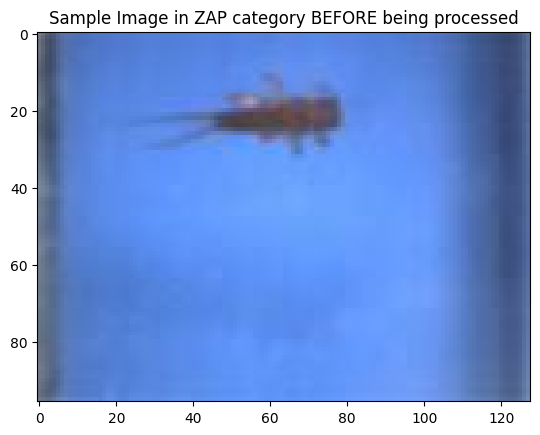

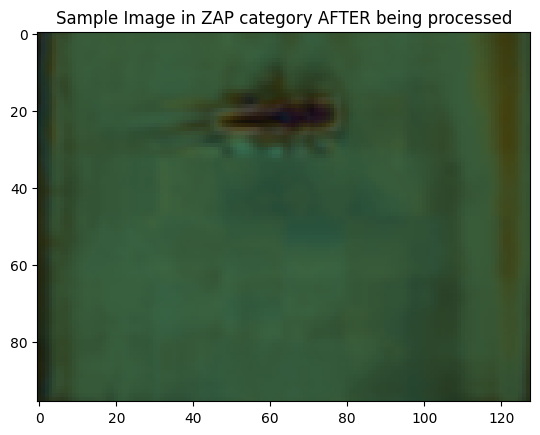

Total number of samples in the training set: 1089
Total number of labels in the training set: 1089
Unique labels in the training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the validation set: 273
Total number of labels in the validation set: 273
Unique labels in the validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [3]:
images, y = load_images(dataset=constants.STONEFLY, setName=constants.set0);
X_train, X_validation, y_train, y_validation = dataSplit(images, y);
# inspect the data
print(f"Total number of samples in the training set: {len(X_train)}");
print(f"Total number of labels in the training set: {len(y_train)}");
print(f"Unique labels in the training set: {np.unique(y_train)}");
print(f"Total number of samples in the validation set: {len(X_validation)}");
print(f"Total number of labels in the validation set: {len(y_validation)}");
print(f"Unique labels in the validation set: {np.unique(y_validation)}");

In [4]:
# save training set and validation set data for easier debugging
cacheData(X_train, "X_train.npy");
cacheData(X_validation, "X_validation.npy");
cacheData(y_train, "y_train.npy");
cacheData(y_validation, "y_validation.npy");

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


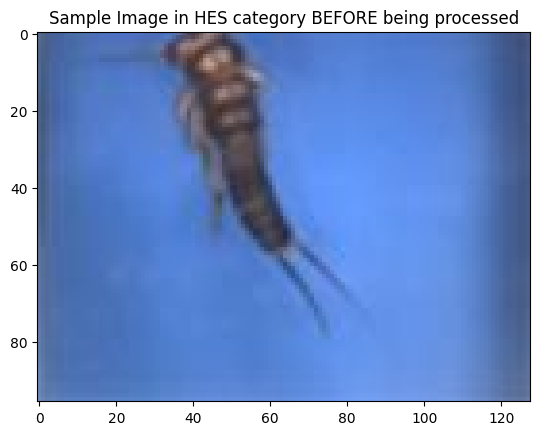

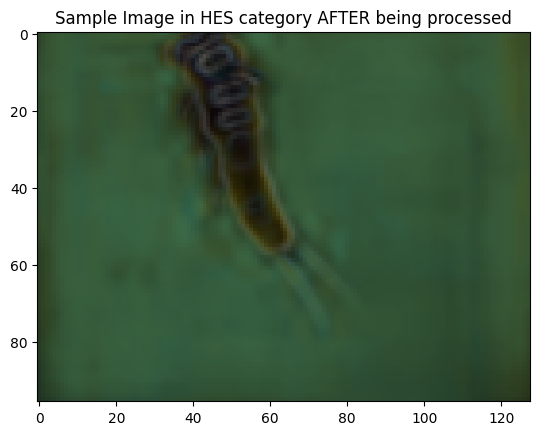

Total number of samples in the test set: 1480
Total number of labels in the test set: 1480
Unique labels in the test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [5]:
X_test, y_test = load_images(dataset=constants.STONEFLY, setName=constants.set1);
print(f"Total number of samples in the test set: {len(X_test)}");
print(f"Total number of labels in the test set: {len(y_test)}");
print(f"Unique labels in the test set: {np.unique(y_test)}");

In [6]:
# save the test set data for easier debugging
cacheData(X_test, "X_test.npy");
cacheData(y_test, "y_test.npy");

# Basic Transfer Learning: Classification

## ResNet Classification

In [2]:
# Load the data from .npy files
X_train = np.load("X_train.npy");
y_train = np.load("y_-train.npy");
X_validation = np.load("X_validation.npy");
y_validation = np.load("y_validation.npy");
X_test = np.load("X_test.npy");
y_test = np.load("y_test.npy");

### Understanding the Features

In [8]:
# Training set
images = pd.Series(y_train);
images.value_counts()

zap    178
dor    143
hes    136
iso    136
yor    134
cal    133
swe    123
pte     71
mos     35
Name: count, dtype: int64

In [9]:
# Validation set
images = pd.Series(y_validation);
images.value_counts()

zap    45
dor    36
yor    34
hes    34
iso    34
cal    33
swe    30
pte    18
mos     9
Name: count, dtype: int64

In [10]:
# Test set
images = pd.Series(y_test);
images.value_counts()

yor    290
hes    200
iso    200
dor    194
swe    185
cal    171
zap    150
pte     55
mos     35
Name: count, dtype: int64

### Load the Model

In [11]:
model = Model();
model.build_classifier();

Now let's observe a summary of our classifiers.

In [12]:
model.resnet50.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,686,913
Trainable params: 2,099,201
Non-trainable params: 23,587,712
_________________________________________

In [13]:
model.resnet50V2.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_______________________________________

### Train the Classifiers

#### resnet50

Unique Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Unique Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]
Epoch 1/10


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35/35 [==============================] - 10s 128ms/step - loss: -69.2443 - accuracy: 0.1322 - val_loss: -170.0301 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 2s 70ms/step - loss: -327.6183 - accuracy: 0.1313 - val_loss: -561.4563 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 2s 69ms/step - loss: -864.5541 - accuracy: 0.1313 - val_loss: -1265.2797 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 2s 69ms/step - loss: -1703.8948 - accuracy: 0.1313 - val_loss: -2278.8779 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 2s 69ms/step - loss: -2884.6023 - accuracy: 0.1313 - val_loss: -3652.0864 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 2s 69ms/step - loss: -4442.0361 - accuracy: 0.1313 - val_loss: -5427.2803 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 2s 70ms/step - loss: -6364.1899 - accuracy: 0.1313 - val_loss: -7500.

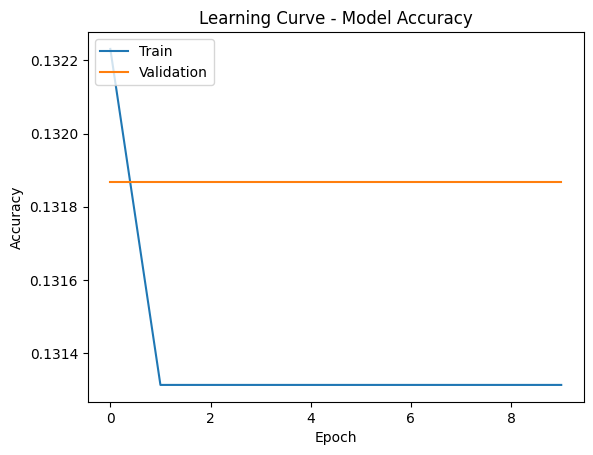

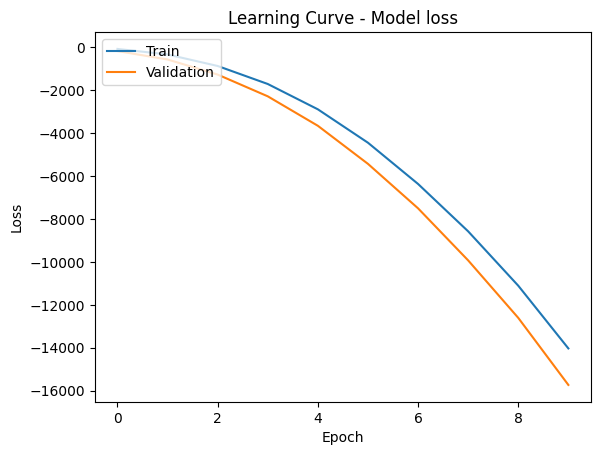

In [14]:
# resnet50
history_resnet50 = model.train(
    model=model.resnet50,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation,
    modelName=constants.RESNET50
);

Evaluate the Model

In [15]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -15683.46875
Validation Binary Cross-Entropy error: -15732.6572265625
Testing Binary Cross-Entropy error: -15732.6572265625


([-15683.46875, 0.13131313025951385],
 [-15732.6572265625, 0.1318681389093399],
 [-15732.6572265625, 0.1318681389093399])

#### resnet50V2

Unique Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Unique Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]
Epoch 1/10


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35/35 [==============================] - 8s 122ms/step - loss: -720.8791 - accuracy: 0.1304 - val_loss: -1992.4532 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 2s 65ms/step - loss: -4004.9082 - accuracy: 0.1313 - val_loss: -7083.8301 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 2s 65ms/step - loss: -10908.0078 - accuracy: 0.1313 - val_loss: -16184.3594 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 2s 65ms/step - loss: -22011.5527 - accuracy: 0.1313 - val_loss: -29734.7617 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 2s 66ms/step - loss: -37419.1641 - accuracy: 0.1313 - val_loss: -47885.9922 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 2s 66ms/step - loss: -57724.8086 - accuracy: 0.1313 - val_loss: -70820.4688 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 2s 65ms/step - loss: -82010.2969 - accuracy: 0.1313 - val

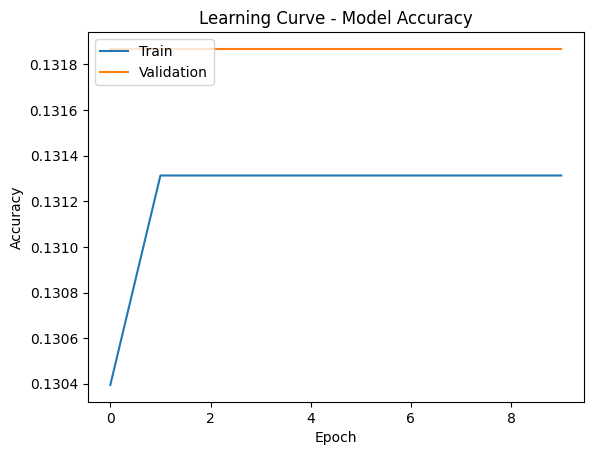

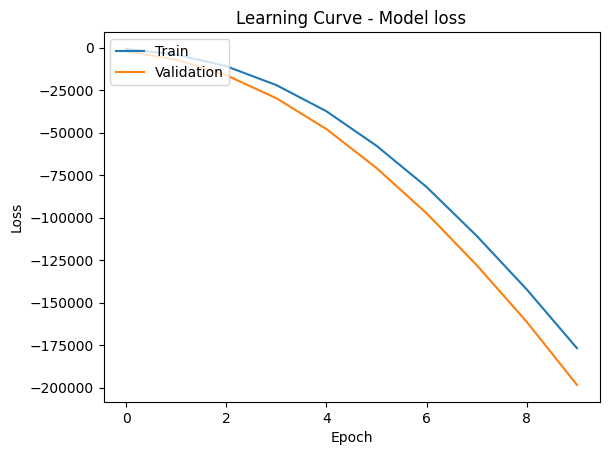

In [16]:
# resnet50V2
history_resnet50V2 = model.train(
    model=model.resnet50V2,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation,
    modelName=constants.RESNET50V2
);

Evaluate the Model

In [17]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50V2,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -196376.4375
Validation Binary Cross-Entropy error: -198404.140625
Testing Binary Cross-Entropy error: -198404.140625


([-196376.4375, 0.13131313025951385],
 [-198404.140625, 0.1318681389093399],
 [-198404.140625, 0.1318681389093399])

### Make Prediction on the Test Set

#### resnet50

In [18]:
# resnet50
print("-----Training Set-----")
y_pred_resnet50_train = model.predict(model.resnet50, X_train);
print("-----Validation Set-----")
y_pred_resnet50_val = model.predict(model.resnet50, X_validation);
print("-----Test Set-----")
y_pred_resnet50_test = model.predict(model.resnet50, X_test);

-----Training Set-----
35/35 [==============================] - 3s 54ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
-----Validation Set-----
2/9 [=====>........................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 52ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
-----Test Set-----
 1/47 [..............................] - ETA: 1s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 3s 64ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### resnet50V2

In [19]:
# Load the classifiers from .h5 files
resnet50 = load_model("resnet50-posttrained.h5");
resnet50V2 = load_model("resnet50V2-posttrained.h5");
model = Model(
    resnet50=resnet50,
    resnet50V2=resnet50V2
)
# resnet50V2
print("-----Training Set-----")
y_pred_resnet50V2_train = model.predict(model.resnet50V2, X_train);
print("-----Validation Set-----")
y_pred_resnet50V2_val = model.predict(model.resnet50V2, X_validation);
print("-----Test Set-----")
y_pred_resnet50V2_test = model.predict(model.resnet50V2, X_test);

-----Training Set-----
35/35 [==============================] - 3s 56ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
-----Validation Set-----
3/9 [=========>....................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 50ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
-----Test Set-----
 3/47 [>.............................] - ETA: 2s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 3s 59ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Performance Evaluation

Print the Confusion Matrix

#### resnet50

In [20]:
# training set
confMtx_resnet50_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50_train
);
confMtx_resnet50_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [21]:
# validation set
confMtx_resnet50_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50_val
);
confMtx_resnet50_val

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [22]:
# test set
confMtx_resnet50_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50_test
);
confMtx_resnet50_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


#### resnet50V2

In [23]:
# training set
confMtx_resnet50V2_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50V2_train
);
confMtx_resnet50V2_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [24]:
# validation set
confMtx_resnet50V2_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50V2_val
);
confMtx_resnet50V2_val

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [25]:
# test set
confMtx_resnet50V2_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50V2_test
);
confMtx_resnet50V2_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


## Discussion

From the learning curves, we can see that:

**ResNet50**
- ResNet50 classifier was trained with a decreasing accuracy on the training set, and a completely flat accuracy on the validation set.
- Initially, its accuracy on the training set started higher than that on the validation set, when the number of epochs was small. 
- Afterwards, when the number of epochs grew, the accuracy on the training set became lower than that on the validation set. 
- ResNet50 classifier had a flat accuracy starting at a certain number of epochs used. 
- From the result of ResNet50, we can see the issue of underfitting, which means that the training data failed to generalize the model well, in general with a lower accuracy.

**ResNet50V2**
- ResNet50V2 classifier was trained with an increasing accuracy (on the training set) and a completely flat accuracy (on the validation set), respectively, when the number of epochs were enlarging.
- ResNet50V2 classifier in general had an overall lower accuracy on the training set than that on the validation set.
- From the ResNet50V2 classifier, the result also tells the issue of underfitting, which means that the training data failed to generalize the model well, in general with a lower accuracy.

**In General**
- When the accuracy of a model remains flat, this means a model failing to learn meaningful patterns in the data.
- Meanwhile, the losses of both models in both the training and the validation set data dropped significantly when the number of epochs were enlarging. This is a good sign however because we are certain that by enlarging the number of epochs used to train a model can reduce the loss of the model, and thus enhance its accuracy. 

From the confusion matricies, we can see that:
- Both classifiers give predictions (based on any set of data) all being from the same label. 
- Such observation is a sign of class imbalance where there exist biases in the training, validation or even the test data.

As a result of the models failing to learn patterns from the data when the number of epochs is large enough, it is therefore a sign of underfitting. 

# Basic Transfer Learning: Regression Network for Bounding Box

## Data Preprocessing

In [3]:
images_set0, y_set0 = load_images(constants.SEGMENTATION, constants.set0);
X_seg_train, X_seg_validation, y_seg_train, y_seg_validation = dataSplit(images_set0, y_set0);
# inspect the data
print(f"Total number of samples in the segmented training set: {len(X_seg_train)}");
print(f"Total number of labels in the segmented training set: {len(y_seg_train)}");
print(f"Unique labels in the segmented training set: {np.unique(y_seg_train)}");
print(f"Total number of samples in the segmented validation set: {len(X_seg_validation)}");
print(f"Total number of labels in the segmented validation set: {len(y_seg_validation)}");
print(f"Unique labels in the segmented validation set: {np.unique(y_seg_validation)}");

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Total number of samples in the segmented training set: 1084
Total number of labels in the segmented training set: 1084
Unique labels in the segmented training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the segmented validation set: 272
Total number of labels in the segmented validation set: 272
Unique labels in the segmented validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [4]:
# save the segmented training set and validation set data for easier debugging
cacheData(X_seg_train, "X_seg_train.npy");
cacheData(X_seg_validation, "X_seg_validation.npy");
cacheData(y_seg_train, "y_seg_train.npy");
cacheData(y_seg_validation, "y_seg_validation.npy");

In [5]:
X_seg_test, y_seg_test = load_images(dataset=constants.SEGMENTATION, setName=constants.set1);
print(f"Total number of samples in the segmented test set: {len(X_seg_test)}");
print(f"Total number of labels in the segmented test set: {len(y_seg_test)}");
print(f"Unique labels in the segmented test set: {np.unique(y_seg_test)}");

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Total number of samples in the segmented test set: 1330
Total number of labels in the segmented test set: 1330
Unique labels in the segmented test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [6]:
# save the segmented test set data for easier debugging
cacheData(X_seg_test, "X_seg_test.npy");
cacheData(y_seg_test, "y_seg_test.npy");

### Test Segmentation File Paths in an External Textfile

In [7]:
file_set0 = open("segmentation-set0-image-paths.txt", "r");
file_set1 = open("segmentation-set1-image-paths.txt", "r");
# splitting the contents into file paths
pathPattern = ".\segmentation";
arr_set0_paths = file_set0.read().split(pathPattern);
arr_set1_paths = file_set1.read().split(pathPattern);
# removing unnecessary items from the list
arr_set0_paths.remove("");
arr_set1_paths.remove("");
# investigate the image paths being read
print(f"Expected Number of Image Paths in set 0: {len(images_set0)}");
print(f"Expected Number of Image Paths in set 1: {len(X_seg_test)}");
print(f"Number of Image Paths being read from set 0: {len(arr_set0_paths)}");
print(f"Number of Image Paths being read from set 1: {len(arr_set1_paths)}");
file_set0.close();
file_set1.close();

Expected Number of Image Paths in set 0: 1356
Expected Number of Image Paths in set 1: 1330
Number of Image Paths being read from set 0: 1356
Number of Image Paths being read from set 1: 1330


### Check the Resolution of a random Segmented Image

In [8]:
# set 0
randInd: int = random.randint(0, len(images_set0) - 1);
randImg = images_set0[randInd];
print(f"Resolution of a random Segmented Image in set 0: {randImg.shape[0]} pixels x {randImg.shape[1]} pixels.");
# set 1
randInd: int = random.randint(0, len(X_seg_test) - 1);
randImg = X_seg_test[randInd];
print(f"Resolution of a random Segmented Image in set 0: {randImg.shape[0]} pixels x {randImg.shape[1]} pixels.");

Resolution of a random Segmented Image in set 0: 96 pixels x 128 pixels.
Resolution of a random Segmented Image in set 0: 96 pixels x 128 pixels.


### Identify the Bounding Box Coordinates

Note: Please manually remove `bbox.txt` file if it exists on your hard drive, as the following process is going to append lines of text into this file. Please allow the program to create a new file. 

#### Set 0

-----set0-----


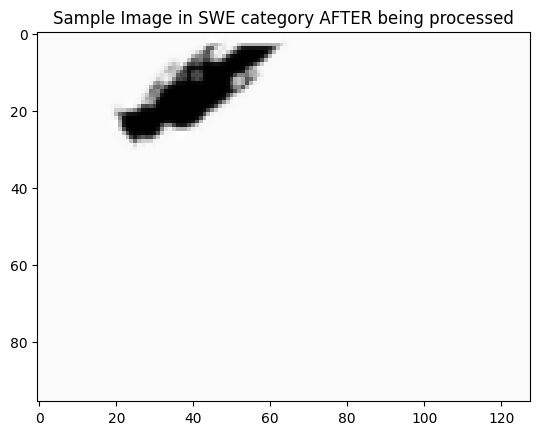

Shape of an image in this set: (96, 128)
Image Name: Swe_12-specimen-i002-s125
Number of non-zero row indices in an image in this set: 12288
Number of non-zero column indices in an image in this set: 12288
Height of an image in set0: 96
Width of an image in set0: 128
Lower left corner of an image in set0: (0.0, 0.0)
Upper right corner of an image in set0: (0.9921875, 0.9895833333333334)
Total Number of Bounding Box coordinates recorded: 1356


In [9]:
file_set0 = open("segmentation-set0-image-paths.txt", "r");
bbox_set0 = saveBBoxCoordinates(
    images_set=images_set0,
    y_images_set=y_set0,
    img_paths=file_set0.read(),
    setName=constants.set0
);
file_set0.close();
print(f"Total Number of Bounding Box coordinates recorded: {len(bbox_set0)}");

Set 1

-----set1-----


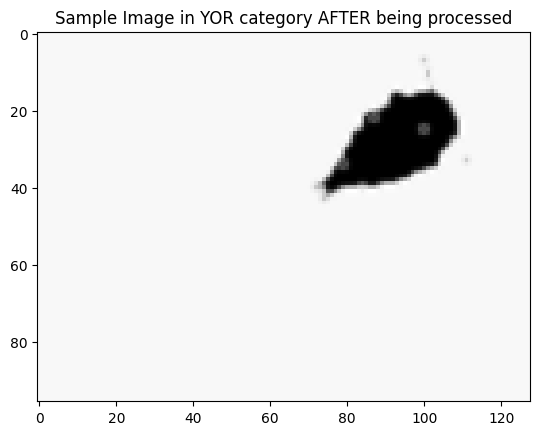

Shape of an image in this set: (96, 128)
Image Name: Yor_129-specimen-i003-s125
Number of non-zero row indices in an image in this set: 12288
Number of non-zero column indices in an image in this set: 12288
Height of an image in set1: 96
Width of an image in set1: 128
Lower left corner of an image in set1: (0.0, 0.0)
Upper right corner of an image in set1: (0.9921875, 0.9895833333333334)
Total Number of Bounding Box coordinates recorded: 1330


In [10]:
file_set1 = open("segmentation-set1-image-paths.txt", "r");
bbox_set1 = saveBBoxCoordinates(
    images_set=X_seg_test,
    y_images_set=y_seg_test,
    img_paths=file_set1.read(),
    setName=constants.set1
);
file_set1.close();
print(f"Total Number of Bounding Box coordinates recorded: {len(bbox_set1)}");

### Inspect the generated `bbox.txt` file

In [11]:
file_bbox = open(constants.BBOX_FILENAME, "r");
print(f"Number of Bounding Box Coordinates printed in the textfile: {len(file_bbox.readlines())}");
print(f"Number of Bounding Box Coordinates recorded for set 0: {len(bbox_set0)}");
print(f"Number of Bounding Box Coordinates recorded for set 1: {len(bbox_set1)}");
file_bbox.close();

Number of Bounding Box Coordinates printed in the textfile: 2686
Number of Bounding Box Coordinates recorded for set 0: 1356
Number of Bounding Box Coordinates recorded for set 1: 1330


### Visualizing a Bounding Box

Note: Before training, it shouldn't be able to circle correctly an object in an image. 

-----set 0-----


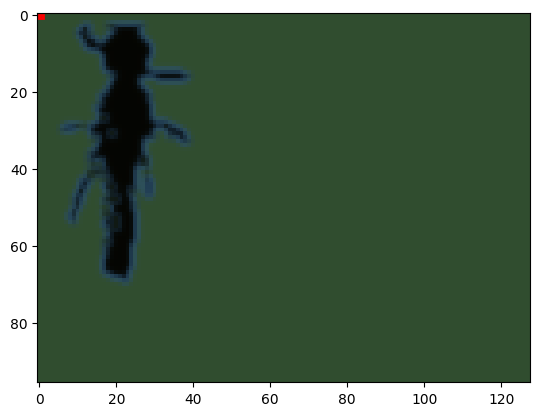

Bounding Box is successfully drawn.


In [12]:
# set 0
print("-----set 0-----");
res = drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=images_set0
);
print("Bounding Box is successfully drawn." if res == True else "Failed to draw a bounding box in an image.");

-----set 1-----


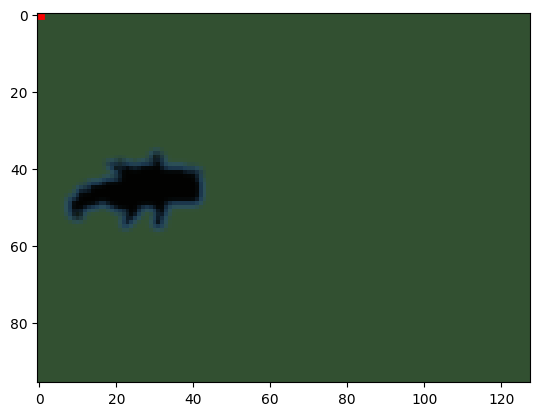

Bounding Box is successfully drawn.


In [13]:
# set 1
print("-----set 1-----");
res = drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=X_seg_test
);
print("Bounding Box is successfully drawn." if res == True else "Failed to draw a bounding box in an image.");

## Network based on ResNet-50

Goal: Transfer our model's learning from a classification problem to a regression problem.

In [14]:
# Load the classifiers from .h5 files
resnet50 = load_model("resnet50-posttrained.h5");
resnet50V2 = load_model("resnet50V2-posttrained.h5");
# Construct the Model again
model = Model(
    resnet50=resnet50,
    resnet50V2=resnet50V2
);

In [15]:
print("-----Verifying ResNet50 classifier-----");
model.resnet50.summary();

-----Verifying ResNet50 classifier-----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,686,913
Trainable params: 0
Non-trainable params: 25,686,913
_________

In [16]:
print("-----Verifying ResNet50V2 classifier-----");
model.resnet50V2.summary();

-----Verifying ResNet50V2 classifier-----
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 0
Non-trainable params: 25,664,001
_____

In our case, we consider only the ResNet50V2 model.

Theoretically speaking, since our base models have been set `trainable = False` before compilation, we need to duplicate a base model (without the last classification layer ), and then add a regression layer at the last layer of our duplicate.

In [17]:
regressor = model.transferLearning(
    baseModel=resnet50V2
);
regressor

In [18]:
regressor.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 1)                 25664001  
                                                                 
 dense (Dense)               (None, 1024)              2048      
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 25,670,149
Trainable params: 6,148
Non-trainable params: 25,664,001
_________________________________________________________________


### Train the new Regressor Model

We need to train the regressor model with the bounding box coordinates instead of the original images.

In [19]:
# Construct samples array
regressor_samples = [bbox_info["binary_image"] for bbox_info in bbox_set0];
regressor_samples = np.array(regressor_samples);
print(f"Total Number of Binary Images as the Samples of this regressor: {len(regressor_samples)}");
print(f"Shape of an Image: {regressor_samples[random.randint(0, len(regressor_samples)-1)].shape}");

Total Number of Binary Images as the Samples of this regressor: 1356
Shape of an Image: (96, 128)


In [20]:
# Construct labels array
regressor_labels = [[bbox_info["lower_left_x"], bbox_info["lower_left_y"], bbox_info["upper_right_x"], bbox_info["upper_right_y"]] for bbox_info in bbox_set0];
regressor_labels = np.array(regressor_labels);
print(f"Number of Labels constructed: {len(regressor_labels)}");
print(f"An Image's Label looks like: {regressor_labels[random.randint(0, len(regressor_labels)-1)]}");
print(f"Number of Unique Labels: {len(np.unique(regressor_labels))}")

Number of Labels constructed: 1356
An Image's Label looks like: [0.         0.         0.9921875  0.98958333]
Number of Unique Labels: 3


In [21]:
# Perform Data Split
regressor_X_train, regressor_X_validation, regressor_y_train, regressor_y_validation = dataSplit(
    X=regressor_samples,
    y=regressor_labels
);
# inspect the data
print(f"Total number of samples in the training set: {len(regressor_X_train)}");
print(f"Total number of labels in the training set: {len(regressor_y_train)}");
print(f"Number of Unique labels in the training set: {len(np.unique(regressor_y_train))}");
print(f"Total number of samples in the validation set: {len(regressor_X_validation)}");
print(f"Total number of labels in the validation set: {len(regressor_y_validation)}");
print(f"Unique labels in the validation set: {len(np.unique(regressor_y_validation))}");

Total number of samples in the training set: 1084
Total number of labels in the training set: 1084
Number of Unique labels in the training set: 3
Total number of samples in the validation set: 272
Total number of labels in the validation set: 272
Unique labels in the validation set: 3


In [22]:
# Transform the Grayscale images so that they are compatible with the model
regressor_X_train = np.stack((regressor_X_train,)*3, axis=-1);
regressor_X_validation = np.stack((regressor_X_validation,)*3, axis=-1);
print(f"Shape of a sample image in training set: {regressor_X_train[random.randint(0, len(regressor_X_train)-1)].shape}");
print(f"Shape of a sample image in validation set: {regressor_X_validation[random.randint(0, len(regressor_X_validation)-1)].shape}");

Shape of a sample image in training set: (96, 128, 3)
Shape of a sample image in validation set: (96, 128, 3)


In [23]:
# Save the Data
cacheData(regressor_X_train, "regressor_X_train.npy");
cacheData(regressor_X_validation, "regressor_X_validation.npy");
cacheData(regressor_y_train, "regression_y_train.npy");
cacheData(regressor_y_validation, "regressor_y_validation.npy");

Epoch 1/10
34/34 [==============================] - 11s 148ms/step - loss: 0.1064 - mae: 0.1842 - val_loss: 0.0101 - val_mae: 0.0744
Epoch 2/10
34/34 [==============================] - 2s 66ms/step - loss: 0.0017 - mae: 0.0241 - val_loss: 1.9453e-05 - val_mae: 0.0035
Epoch 3/10
34/34 [==============================] - 2s 66ms/step - loss: 4.0671e-05 - mae: 0.0039 - val_loss: 7.0030e-06 - val_mae: 0.0016
Epoch 4/10
34/34 [==============================] - 2s 66ms/step - loss: 1.2006e-06 - mae: 5.8553e-04 - val_loss: 2.8828e-07 - val_mae: 3.3638e-04
Epoch 5/10
34/34 [==============================] - 2s 66ms/step - loss: 4.4756e-08 - mae: 1.0827e-04 - val_loss: 7.9681e-09 - val_mae: 6.0527e-05
Epoch 6/10
34/34 [==============================] - 2s 66ms/step - loss: 1.2928e-09 - mae: 2.0838e-05 - val_loss: 1.8723e-10 - val_mae: 1.0043e-05
Epoch 7/10
34/34 [==============================] - 2s 66ms/step - loss: 3.2140e-11 - mae: 3.5135e-06 - val_loss: 5.7603e-13 - val_mae: 5.9520e-07
Epoch

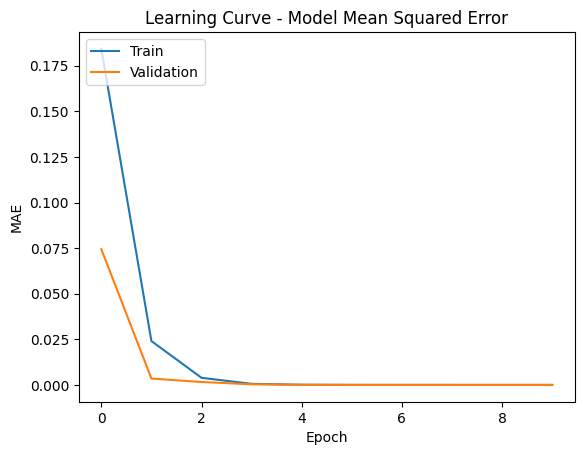

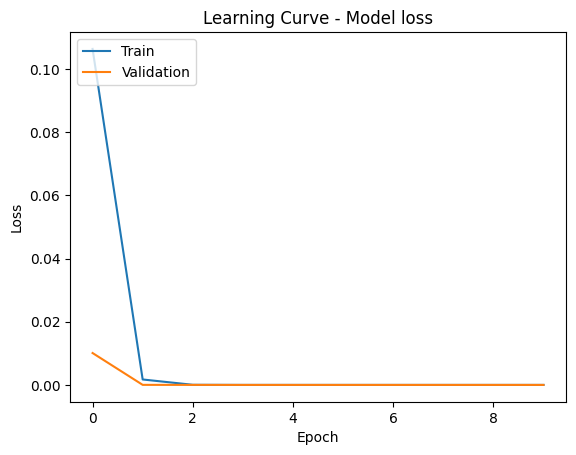

In [24]:
# resnet50V2 - Regression
history_resnet50V2_regressor = model.train(
    model=regressor,
    X_train=regressor_X_train,
    y_train=regressor_y_train,
    X_val=regressor_X_validation,
    y_val=regressor_y_validation,
    modelName=constants.RESNET50V2,
    isRegression=True
);
history_resnet50V2_regressor

In [25]:
'''
Output Structure: tuple
first array: [training loss, training MAE],
second array: [validation loss, validation MAE],
third array: [test loss, test MAE]
'''
model.evaluate(
    model=regressor,
    X_train=X_seg_train,
    y_train=encodeLabel(y_seg_train),
    X_val=X_seg_validation,
    y_val=encodeLabel(y_seg_validation),
    X_test=X_seg_test,
    y_test=encodeLabel(y_seg_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: 20.944873809814453
Validation Binary Cross-Entropy error: 20.91759490966797
Testing Binary Cross-Entropy error: 20.91759490966797


([20.944873809814453, 3.682405710220337],
 [20.91759490966797, 3.679922103881836],
 [20.91759490966797, 3.679922103881836])

### Make Predictions on the new Regressor Model

We need to construct a test set for prediction, which refers to the set 1 in our segmented data.

In [26]:
# Construct samples array
regressor_test_samples = [bbox_info["binary_image"] for bbox_info in bbox_set1];
regressor_test_samples = np.array(regressor_test_samples);
print(f"Total Number of Binary Images as the Samples of this regressor in the Test Set: {len(regressor_test_samples)}");
print(f"Shape of an Image in the Test Set: {regressor_test_samples[random.randint(0, len(regressor_test_samples)-1)].shape}");

Total Number of Binary Images as the Samples of this regressor in the Test Set: 1330
Shape of an Image in the Test Set: (96, 128)


In [27]:
# Construct labels array
regressor_y_test = [[bbox_info["lower_left_x"], bbox_info["lower_left_y"], bbox_info["upper_right_x"], bbox_info["upper_right_y"]] for bbox_info in bbox_set1];
regressor_y_test = np.array(regressor_y_test);
print(f"Number of Labels constructed: {len(regressor_y_test)}");
print(f"An Image's Label looks like: {regressor_y_test[random.randint(0, len(regressor_y_test)-1)]}");
print(f"Number of Unique Labels: {len(np.unique(regressor_y_test))}")

Number of Labels constructed: 1330
An Image's Label looks like: [0.         0.         0.9921875  0.98958333]
Number of Unique Labels: 3


In [28]:
# Transform the Grayscale images so that they are compatible with the model
regressor_X_test = tf.image.grayscale_to_rgb(tf.expand_dims(regressor_test_samples, axis=-1));
print(f"Shape of a sample image in test set: {regressor_X_test[random.randint(0, len(regressor_X_test)-1)].shape}");

Shape of a sample image in test set: (96, 128, 3)


Make Predictions

In [29]:
regressor_y_pred = model.predict(
    model=regressor,
    X_test=regressor_X_test,
    isRegression=True
);
print(f"A Prediction looks like: {regressor_y_pred[random.randint(0, len(regressor_y_pred)-1)]}");

42/42 [==============================] - 4s 71ms/step
Number of Predictions made: 1330
Number of Unique Labels in Prediction: 3
A Prediction looks like: [9.313226e-10 9.313226e-10 9.921875e-01 9.895833e-01]


### Visualizing a Prediction

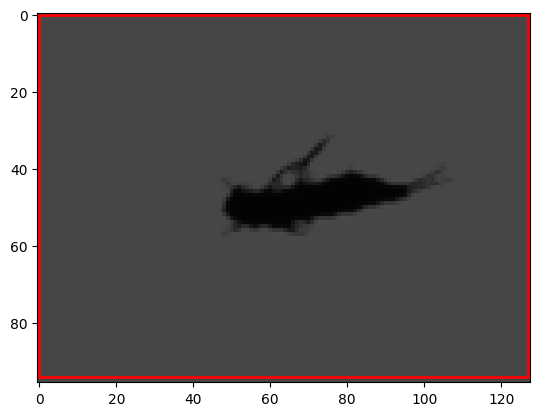

In [30]:
drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=regressor_X_test,
    y_imageSet=regressor_y_pred, # predicted labels
    isPred=True
);

### Visualizing the Ground Truth

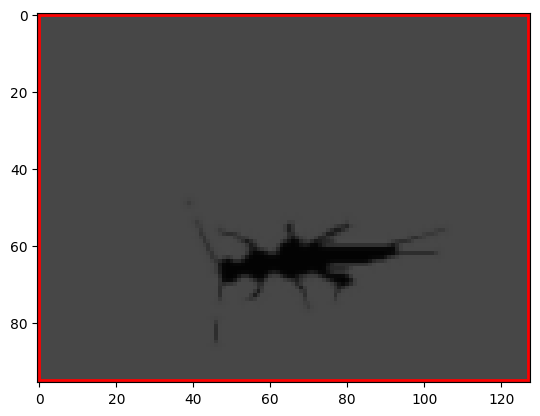

In [31]:
drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=regressor_X_test,
    y_imageSet=regressor_y_test, # true labels
    isPred=True
);

**Observation**
- The trained bounding box failed to accurately circle an object in an image. 
- Instead, it circled the entire image.
- Therefore, it is a sign of overfitting, because back when we trained the regressor model, the training data generalized the model too well, causing it to recognize everything in a new (unseen) image as the object to circle / to identify. 
- In this case, we need to perform regularization in order to reduce the risk of overfitting, so that the model will be improved to generalize new (test) data better. 

## Multi-task Regularization

### Obtain the Models from Previous Sections

Note: We still only consider the ResNet50V2 model.

In [32]:
resnet50V2_classifier_posttrained = model.resnet50V2;
resnet50V2_classifier_posttrained.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 0
Non-trainable params: 25,664,001
_______________________________________________

In [33]:
resnet50V2_regressor_posttrained = model.resnet50V2_regressor;
resnet50V2_regressor_posttrained.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 1)                 25664001  
                                                                 
 dense (Dense)               (None, 1024)              2048      
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 25,670,149
Trainable params: 6,148
Non-trainable params: 25,664,001
_________________________________________________________________


To perform regularization, we need the pre-trained model. Therefore, we obtain the pre-trained version from th .h5 file.

In [34]:
resnet50V2_classifier_pretrained = load_model("resnet50V2-pretrained.h5");
resnet50V2_classifier_pretrained.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_______________________________________

### Regularization

In [35]:
resnet50V2_combined = model.regularize(
    model=resnet50V2_classifier_pretrained
);
resnet50V2_combined.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 model_1 (Functional)           (None, 1)            25664001    ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 512)          1024        ['model_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 512)          1024        ['model_1[0][0]']            

### Construct the Labels Sets

In [36]:
combined_y_train = (y_seg_train, regressor_y_train);
print(f"Length of Combined Labels array in Training Set: {len(combined_y_train)}");

Length of Combined Labels array in Training Set: 2


In [37]:
combined_y_val = (y_seg_validation, regressor_y_validation);
print(f"Length of Combined Labels array in Training Set: {len(combined_y_val)}");

Length of Combined Labels array in Training Set: 2


In [38]:
combined_y_test = (y_seg_test, regressor_y_test);
print(f"Length of Combined Labels array in Training Set: {len(combined_y_test)}");

Length of Combined Labels array in Training Set: 2


### Re-train the Model

Unique Encoded Labels for Classification in training set: [0. 1.]
Unique Encoded Labels for Classification in validation set: [0. 1.]
Epoch 1/10


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34/34 [==============================] - 7s 99ms/step - loss: 4.3800 - classification_output_loss: 0.4707 - regression_output_loss: 3.9093 - classification_output_accuracy: 0.1642 - regression_output_mae: 0.4060 - val_loss: 4.1990 - val_classification_output_loss: 0.3531 - val_regression_output_loss: 3.8459 - val_classification_output_accuracy: 0.1654 - val_regression_output_mae: 0.4812
Epoch 2/10
34/34 [==============================] - 2s 69ms/step - loss: 4.1903 - classification_output_loss: 0.3445 - regression_output_loss: 3.8458 - classification_output_accuracy: 0.1411 - regression_output_mae: 0.4997 - val_loss: 4.1870 - val_classification_output_loss: 0.3411 - val_regression_output_loss: 3.8459 - val_classification_output_accuracy: 0.1654 - val_regression_output_mae: 0.5071
Epoch 3/10
34/34 [==============================] - 2s 69ms/step - loss: 4.1876 - classification_output_loss: 0.3417 - regression_output_loss: 3.8458 - classification_output_accuracy: 0.1642 - regression_outpu

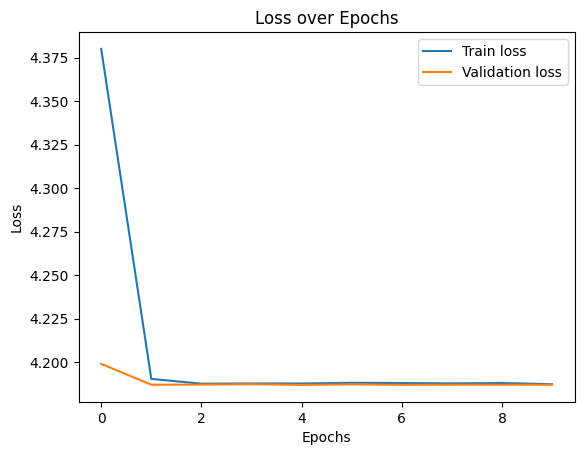

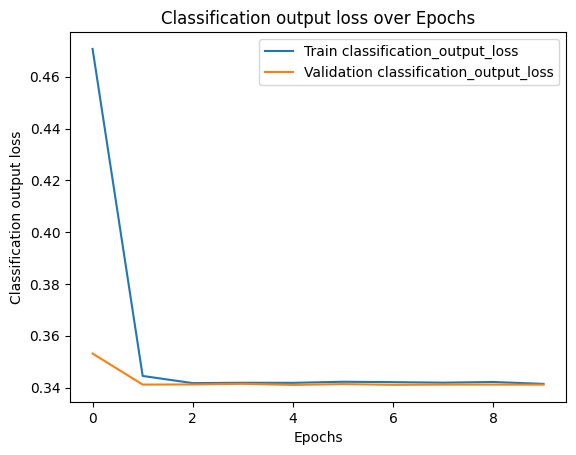

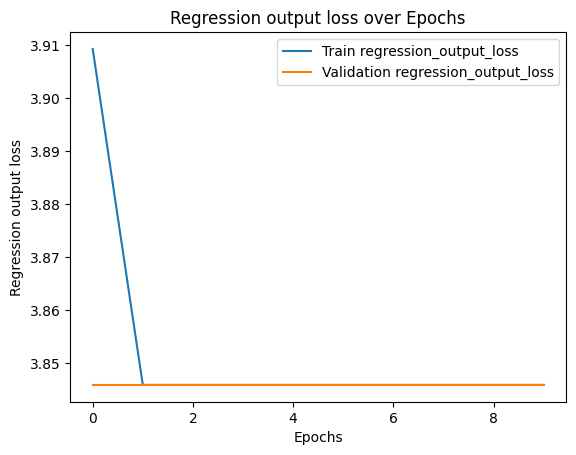

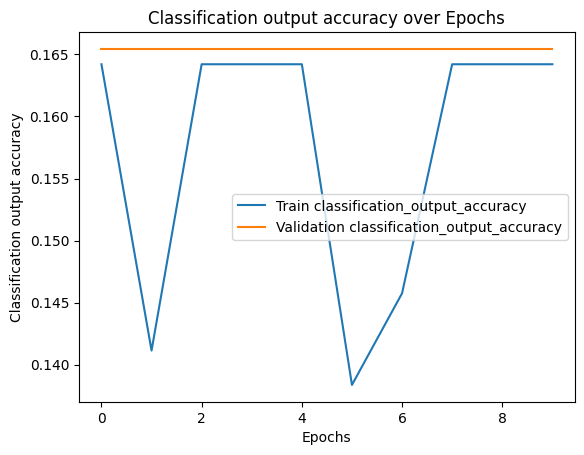

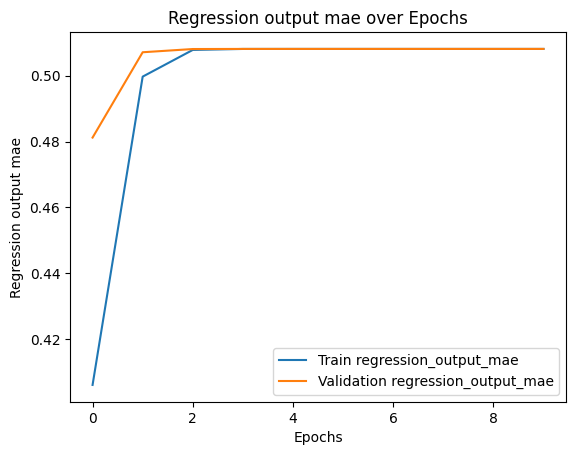

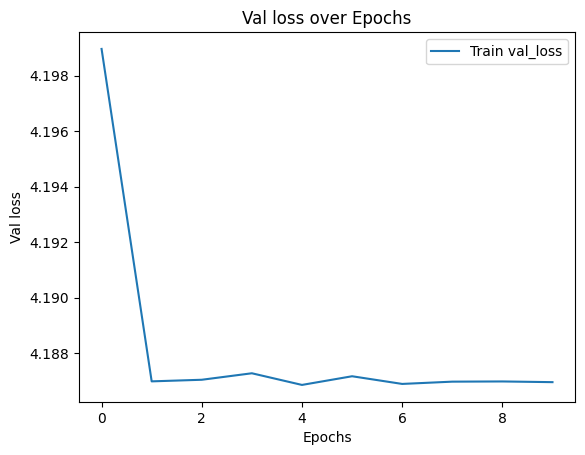

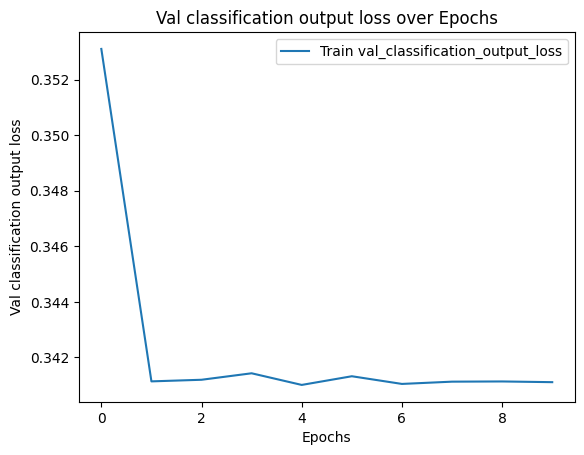

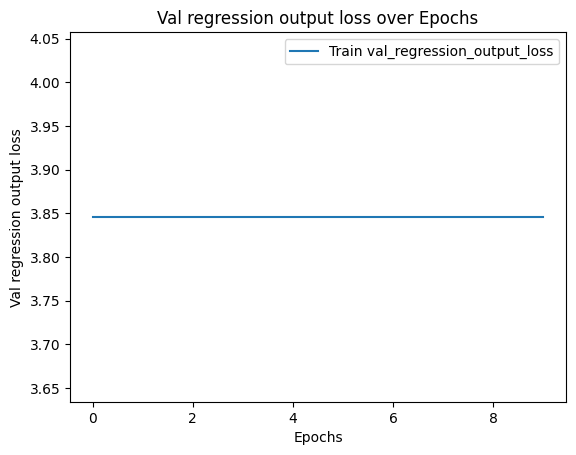

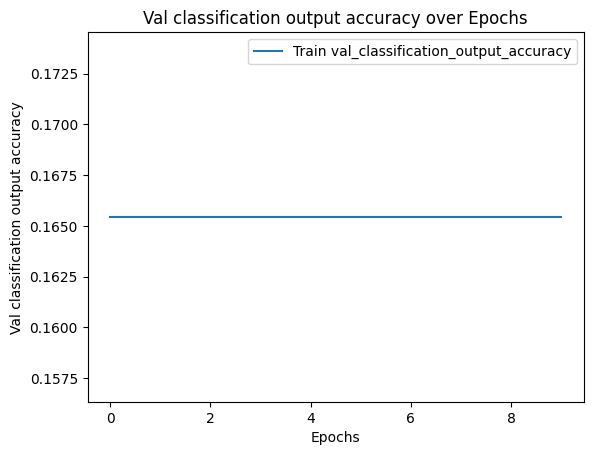

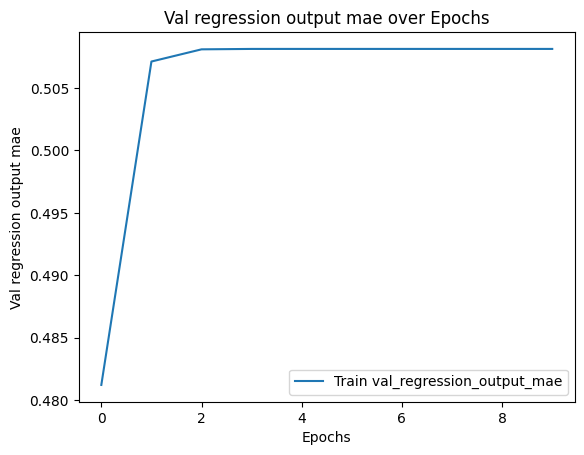

In [39]:
history_resnet50V2_combined = model.train(
    model=resnet50V2_combined,
    X_train=regressor_X_train,
    y_train=combined_y_train,
    X_val=regressor_X_validation,
    y_val=combined_y_val,
    modelName="",
    isRegression=True,
    isRegularized=True
);

### Evaluate the Metrics in this training

In [40]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=resnet50V2_combined,
    X_train=regressor_X_train,
    y_train=combined_y_train,
    X_val=regressor_X_validation,
    y_val=combined_y_val,
    X_test=regressor_X_test,
    y_test=combined_y_test,
    isRegularized=True
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Unique Encoded Labels for Classification in training set: [0. 1.]
Unique Encoded Labels for Classification in validation set: [0. 1.]
Unique Encoded Labels for Classification in test set: [0. 1.]
Training Binary Cross-Entropy error: 4.186805248260498
Validation Binary Cross-Entropy error: 4.186958312988281
Testing Binary Cross-Entropy error: 4.185590744018555


([4.186805248260498,
  0.3409542143344879,
  3.8458499908447266,
  0.1642066389322281,
  0.5081452131271362],
 [4.186958312988281,
  0.34110623598098755,
  3.8458516597747803,
  0.16544117033481598,
  0.508145272731781],
 [4.185590744018555,
  0.3397391736507416,
  3.845850706100464,
  0.11278195679187775,
  0.5081455111503601])

### Make Predictions

In [41]:
y_pred_resnet50V2_combined_test_class, y_pred_resnet50V2_combined_test_reg = model.predict(
    model=resnet50V2_combined,
    X_test=regressor_X_test,
    isRegression=True,
    isRegularized=True
);

42/42 [==============================] - 3s 50ms/step
Number of Predictions made: 2
Unique Labels in Classification Prediction: ['cal']
Number of Unique Labels in Regression Prediction: 40
A Regression Prediction looks like: [-0.1324315  -0.18927266  1.6138884  -0.09959362]


### Visualizing a Prediction

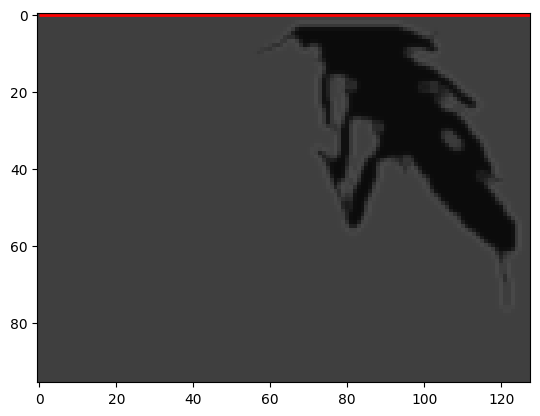

In [42]:
drawBoundingBox(
    X_imageSet=regressor_X_test,
    y_imageSet=y_pred_resnet50V2_combined_test_reg,
    isPred=True
);

**Observations**
- The model starts recognizing an object in an image, instead of simply circling the entire image in all cases, although it still fails to accurately circle it. 
- Because some valued in the coordinates were predicted negative, the bounding box was unfortunately unable to be displayed in the grid with the image where only positive values in a set of coordinates are allowed. 

# Data Augmentation

As a result of unreasonable (negative) values in coordinates from a regression-based prediction, we need to adjust the data of the bounding box's coordinates.

Note: We need not to care about the classification prediction because we are now applying a data augmentation approach to our regressor model only, in order to acquire a better prediction of a bounding box. 

## Strategy 1: Taking Absolute Values

Absolute values greatly avoids all negative values in coordinates, it flips the negative values back to the positive side such that now the entire bounding box could be displayed 😏😁

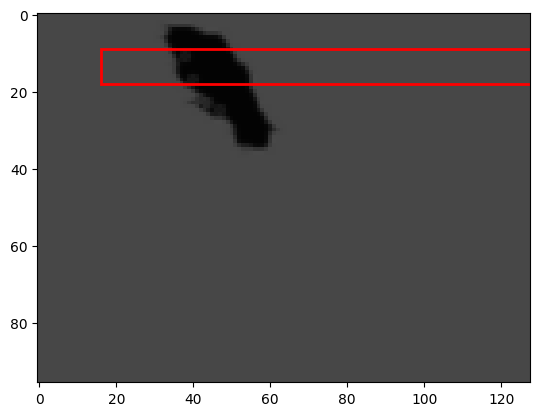

In [43]:
drawBoundingBox(
    X_imageSet=regressor_X_test,
    # take absolute values since the coordinates are predicted negative
    # flip negative coordinates to the positive side
    y_imageSet=np.abs(y_pred_resnet50V2_combined_test_reg),
    isPred=True
);

**Observation**
- Now the boounding box is mostly visible in the grid, although it still fails to circle an object in an image accurately.

## Strategy 2: Shifting the bounding box

In [44]:
# Adjust the Training Set
regressor_X_train_adjusted, regressor_y_train_adjusted = dataAugmentation(
    X=regressor_X_train,
    y=regressor_y_train
);

Shape of a new Image: (96, 128, 3)
Total Number of Images adjusted: 1084
Shape of new BBox Coordinates: (4,)
New BBox Coordinates look like: [124.45149994  93.09812164 125.42372131  94.0677948 ]


In [45]:
# Adjust the Validation Set
regressor_X_validation_adjusted, regressor_y_validation_adjusted = dataAugmentation(
    X=regressor_X_validation,
    y=regressor_y_validation
);

Shape of a new Image: (96, 128, 3)
Total Number of Images adjusted: 272
Shape of new BBox Coordinates: (4,)
New BBox Coordinates look like: [119.65899658  89.51300049 120.59377289  90.44532776]


In [49]:
# Adjust the Test Set
regressor_X_test_adjusted, regressor_y_test_adjusted = dataAugmentation(
    X=regressor_X_test,
    y=regressor_y_test
);

Shape of a new Image: (96, 128, 3)
Total Number of Images adjusted: 1330
Shape of new BBox Coordinates: (4,)
New BBox Coordinates look like: [  0.         100.49334717   1.04944539 101.54003906]


### Re-train the Model

Epoch 1/10
34/34 [==============================] - 2s 69ms/step - loss: 5920.6621 - mae: 56.2234 - val_loss: 4981.9668 - val_mae: 55.8097
Epoch 2/10
34/34 [==============================] - 2s 67ms/step - loss: 4193.9282 - mae: 56.0915 - val_loss: 3441.6409 - val_mae: 55.4683
Epoch 3/10
34/34 [==============================] - 2s 67ms/step - loss: 3279.3330 - mae: 55.6138 - val_loss: 3171.1794 - val_mae: 55.3799
Epoch 4/10
34/34 [==============================] - 2s 67ms/step - loss: 3181.4973 - mae: 55.5804 - val_loss: 3168.4167 - val_mae: 55.4690
Epoch 5/10
34/34 [==============================] - 2s 67ms/step - loss: 3175.4751 - mae: 55.5740 - val_loss: 3172.7217 - val_mae: 55.5198
Epoch 6/10
34/34 [==============================] - 2s 67ms/step - loss: 3169.7407 - mae: 55.5050 - val_loss: 3174.9731 - val_mae: 55.5212
Epoch 7/10
34/34 [==============================] - 2s 67ms/step - loss: 3169.3284 - mae: 55.5231 - val_loss: 3171.1648 - val_mae: 55.5101
Epoch 8/10
34/34 [=========

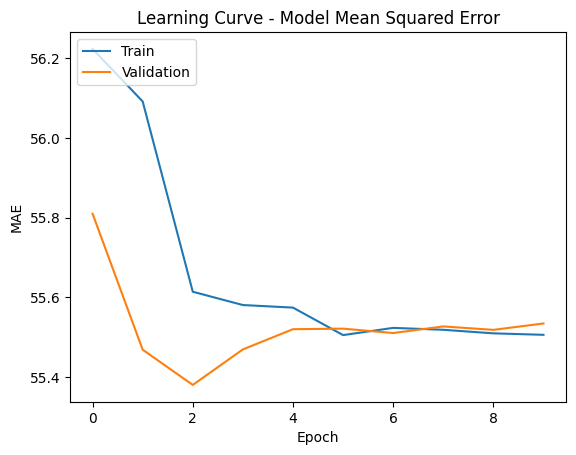

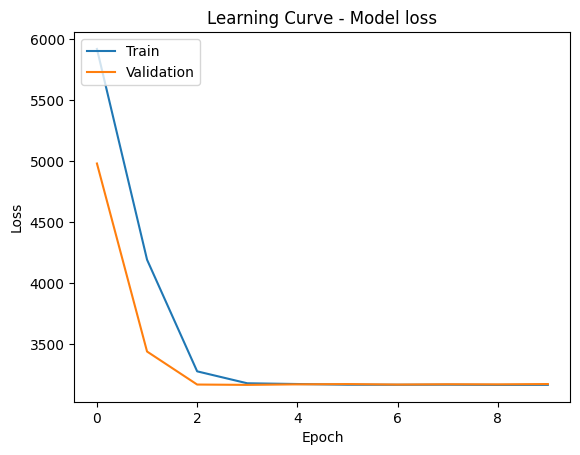

In [46]:
history_resnet50V2_augmented = model.train(
    model=regressor,
    X_train=regressor_X_train_adjusted,
    y_train=regressor_y_train_adjusted,
    X_val=regressor_X_validation_adjusted,
    y_val=regressor_y_validation_adjusted,
    modelName=constants.RESNET50V2,
    isRegression=True
);
history_resnet50V2_augmented

### Evaluate the Model in this Training

In [50]:
model.evaluate(
    model=regressor,
    X_train=regressor_X_train_adjusted,
    y_train=regressor_y_train_adjusted,
    X_val=regressor_X_validation_adjusted,
    y_val=regressor_y_validation_adjusted,
    X_test=regressor_X_test_adjusted,
    y_test=regressor_y_test_adjusted
)

Training Binary Cross-Entropy error: 3166.998779296875
Validation Binary Cross-Entropy error: 3175.2734375
Testing Binary Cross-Entropy error: 3175.2734375


([3166.998779296875, 55.49006652832031],
 [3175.2734375, 55.534156799316406],
 [3175.2734375, 55.534156799316406])

### Make Predictions

In [51]:
y_pred_resnet50v2_augemented = model.predict(
    model=regressor,
    X_test=regressor_X_test_adjusted,
    isRegression=True
)
print(f"A Prediction looks like: {y_pred_resnet50v2_augemented[random.randint(0, len(y_pred_resnet50v2_augemented)-1)]}");

42/42 [==============================] - 2s 50ms/step
Number of Predictions made: 1330
Number of Unique Labels in Prediction: 4
A Prediction looks like: [65.7207   46.667248 66.73811  47.64958 ]


### Visualizing a Prediction

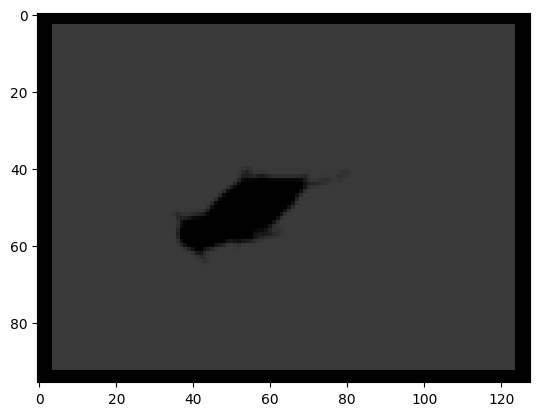

In [55]:
drawBoundingBox(
    X_imageSet=regressor_X_test_adjusted,
    y_imageSet=y_pred_resnet50v2_augemented,
    isPred=True
);

### Visualizing the Ground Truth

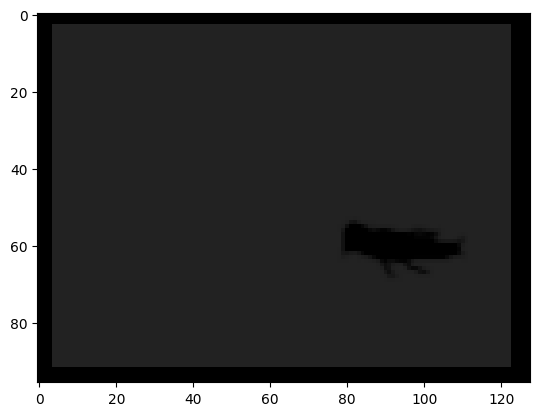

In [57]:
drawBoundingBox(
    X_imageSet=regressor_X_test_adjusted,
    y_imageSet=regressor_y_test_adjusted,
    isPred=True
);

**Observations**
- The bounding box still circled the entire image. 
- Interestingly, by taking a closer look to the visualizations, you can see that originally bluured images are now highlighted a bit such that the regressor recognizes better. 
- Moreover, the bounding box recognition also zoomed in the image larger, meaning the higher chance to have accurately circled an object in an image. 
- As the brightness of the entire image has been slightly adjusted, so do the borders of the bounding box. 